transport:


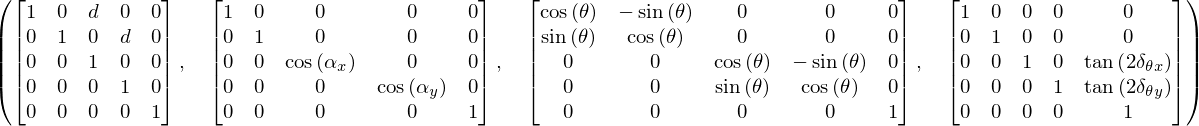

In [2]:
import sympy
from sympy import *
import numpy as np
init_printing(use_unicode=True)
from matplotlib import rc
import mpmath
import pandas as pd
import matplotlib.pylab as plt
d, cx, varx, rot_x = symbols('d alpha_x  delta_theta_x theta')
cy, vary = symbols("alpha_y delta_theta_y")

d1, d2, d0 = symbols("d_1 d_2, d_0")

f1, f2 = symbols('f_1 f_2')
dx, dy, dtheta = symbols('dx, dy , delta_theta')

xi, yi, thxi, thyi = symbols('x_i y theta_i theta_y')

drift = Matrix([ [1, 0, d, 0,0], [0,1,0,d,0], [0,0,1,0,0], [0,0,0,1,0],[0,0,0,0,1] ])

scaling = Matrix([[1,0,0,0,0], [0,1,0,0,0], [0,0,cos(cx),0,0], [0,0,0,cos(cy),0], [0,0,0,0,1]])
scaling_y = Matrix([[ cos(cy),0,0 ,0,0], [0,1,0,0,0], [0,0,1,0,0], [0,0,0,1,0], [0,0,0,0,1]])

rotx = Matrix([[cos(rot_x), -sin(rot_x),0,0,0], [sin(rot_x), cos(rot_x),0,0,0], [0,0,cos(rot_x), -sin(rot_x),0], [0,0,sin(rot_x), cos(rot_x),0] ,[0,0,0,0,1]])

t_mirror = Matrix([ [1,0,0,0,0],[0,1,0,0,0], [0,0,1,0,tan(2*varx)],[0,0,0,1,tan(2*vary)],[0,0,0,0,1] ])

t_mirror

arr = []
transport = drift*scaling*rotx*t_mirror

alg_vec = Matrix([[xi], [thxi], [1]])

vec = np.matrix([ [0],[0],[0],[0],[1] ])
print("transport:")
(drift, scaling, rotx,t_mirror)
    

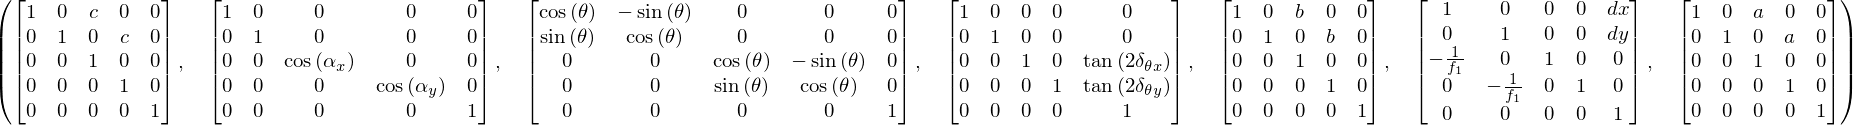

In [43]:
z1,z2,z3 = symbols("a b c")
l_tiltx, l_tilty = symbols('delta_gamma delta_chi')
lens = Matrix([[1,0,0,0,dx ],[0,1,0,0,dy], [-1/f1, 0,1,0,0], [0,-1/f1,0,1,0], [0,0,0,0,1]])
z1mtx = Matrix([ [1, 0, z1, 0,0], [0,1,0,z1,0], [0,0,1,0,0], [0,0,0,1,0],[0,0,0,0,1] ])
z2mtx = Matrix([ [1, 0, z2, 0,0], [0,1,0,z2,0], [0,0,1,0,0], [0,0,0,1,0],[0,0,0,0,1] ])
z3mtx = Matrix([ [1, 0, z3, 0,0], [0,1,0,z3,0], [0,0,1,0,0], [0,0,0,1,0],[0,0,0,0,1] ])

m1mtx = Matrix([ [1,0,0,0,0],[0,1,0,0,0], [0,0,1,0,tan(2*varx)],[0,0,0,1,tan(2*vary)],[0,0,0,0,1] ])


(z3mtx, scaling, rotx, m1mtx, z2mtx, lens, z1mtx)

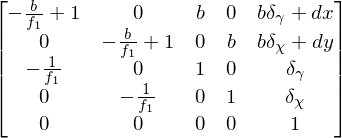

In [4]:
z2mtx*lens

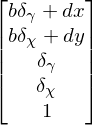

In [5]:
z2mtx*lens*vec

lens mirror system:


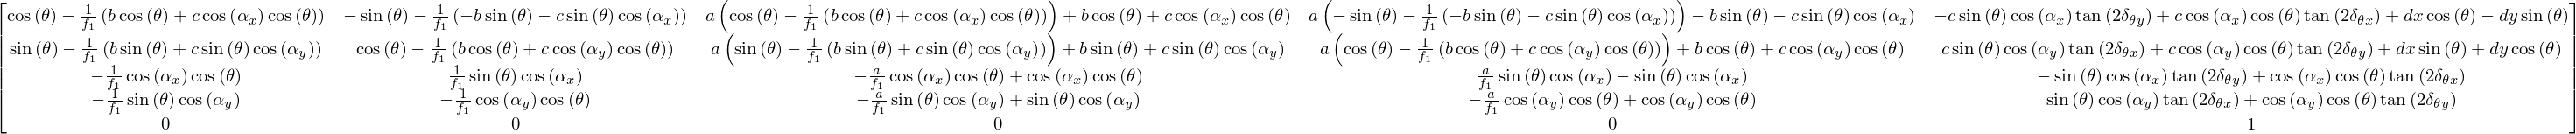

In [44]:
print("lens mirror system:")

lmsystem = z3mtx* scaling * rotx* m1mtx*z2mtx* lens* z1mtx

lmsystem

In [ ]:
(lmsystem.subs([(l_tiltx,0), (l_tilty,0), (cy,np.deg2rad(45)), (cx,np.deg2rad(0)),(rot_x, np.deg2rad(90))   ]))

In [ ]:
print("output lens mirror system:")
(lmsystem.subs([(l_tiltx,0), (l_tilty,0), (cy,np.deg2rad(45)), (cx,np.deg2rad(0)),(rot_x, np.deg2rad(90)), (f1, 200)   ]))*vec

In [ ]:
drift*scaling

In [ ]:
transport

In [ ]:
transport.subs([(rot_x, np.deg2rad(90)), (d,400), (varx, np.deg2rad(5)),
                (vary, np.deg2rad(5)), (cy,np.deg2rad(45)), (cx,np.deg2rad(0))   ])*vec

In [117]:

lens = Matrix([[1,0,0,0,dx ],[0,1,0,0,dy], [-1/f1, 0,1,0,0], [0,-1/f1,0,1,l_tilty], [0,0,0,0,1]])



mirror1 = Matrix([[1, 0,tan(2*varx)], [0,1, 0], [0,0,1]])


drift0 =Matrix([ [1, 0, d0, 0,0], [0,1,0,d0,0], [0,0,1,0,0], [0,0,0,1,0],[0,0,0,0,1] ])
drift1 = Matrix([ [1, 0, d1, 0,0], [0,1,0,d1,0], [0,0,1,0,0], [0,0,0,1,0],[0,0,0,0,1] ])
drift2 = Matrix([ [1, 0, d2, 0,0], [0,1,0,d2,0], [0,0,1,0,0], [0,0,0,1,0],[0,0,0,0,1] ])




print("lens system:")
lens_system = drift1*lens*drift0*scaling*rotx*t_mirror

"""
lens_system.subs([(rot_x, np.deg2rad(90)), (d0,200), (d1,200), (varx, np.deg2rad(5)),
                  (l_tiltx, 0), (l_tilty,0), (dy,0),
                (vary, np.deg2rad(5)), (cy,np.deg2rad(45)), (cx,np.deg2rad(0)), (f1,200)   ])*vec
"""


ValueError: Got rows of variable lengths: [4, 5]

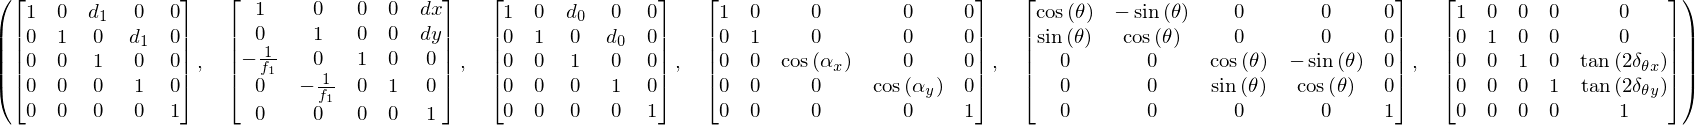

In [45]:
(drift1,lens,drift0,scaling,rotx,t_mirror)

lens mirror system:


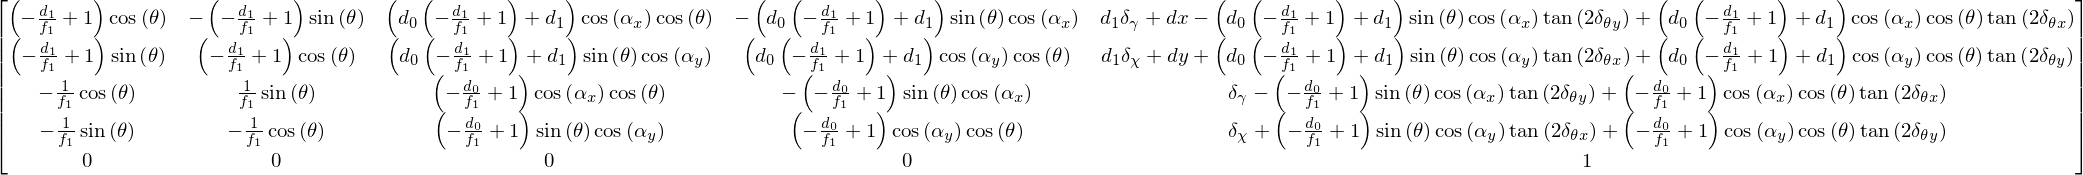

In [103]:
print("lens mirror system:")
lens_system

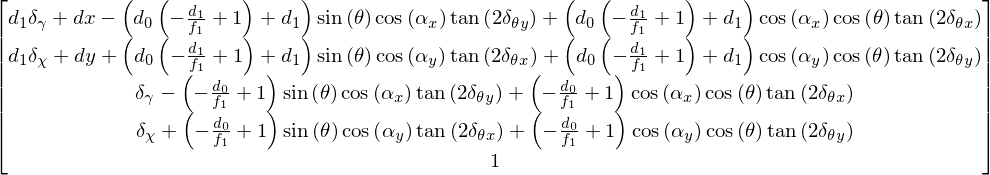

In [102]:
vec_lens = lens_system*vec
(vec_lens)

mirror system:


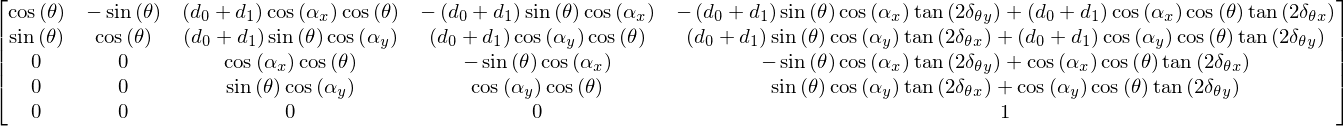

In [62]:
print("mirror system:")
m_system = drift1*drift0*scaling*rotx*t_mirror
m_system

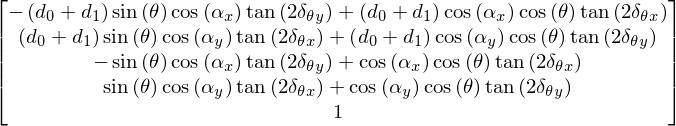

In [104]:
vec = np.matrix([ [0],[0],[0],[0],[1] ])
vec_m = m_system*vec
vec_m

diff between mirror and lens system:


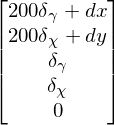

In [118]:
print("diff between mirror and lens system:")
diff = vec_lens - vec_m
dfinal = diff.subs([(rot_x, np.deg2rad(90)), (d0,200), (d1,200), (varx, 0), 
                  
                (vary, 0), (cx,np.deg2rad(45)), (cy,np.deg2rad(0)), (f1,200)   ])

#"(l_tiltx, np.deg2rad(1)), (l_tilty, np.deg2rad(1))"
dfinal

In [111]:
(dfinal[2],dfinal[3])

thetay = -np.rad2deg(0.176)
thetax = np.rad2deg(0.125)

(thetax, thetay)

In [ ]:
(drift2,lens,drift1,scaling,rotx,t_mirror,drift0)

lens mirror system:


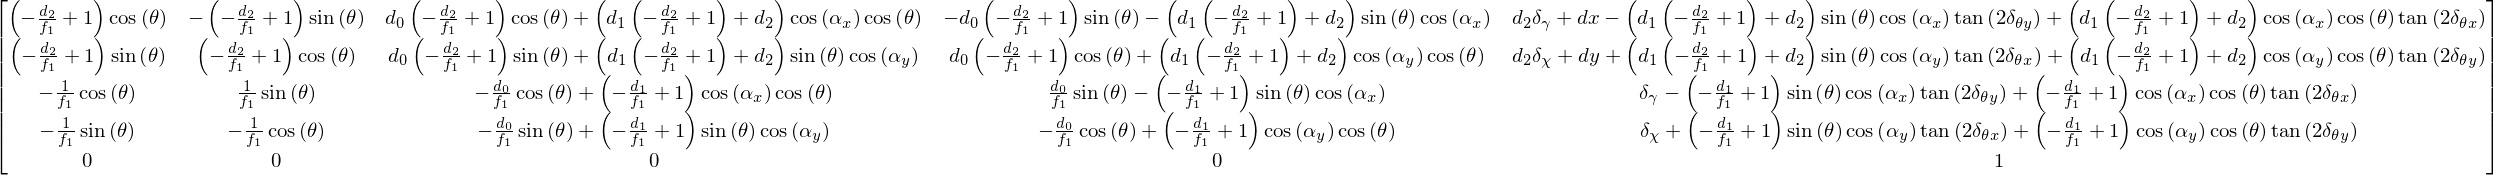

In [12]:
lens_mirror_system =drift2*lens*drift1*scaling*rotx*t_mirror*drift0

print("lens mirror system:")
lens_mirror_system

In [11]:
lens_mirror_system.subs([(dtheta,0), (rot_x, np.deg2rad(90)), (varx, np.deg2rad(10))    ])*vec

NameError: name 'lens_mirror_system' is not defined

In [ ]:
varx2, vary2, cx2, cy2, rev2 = symbols(" delta_theta_x_2 delta_theta_y_2 alpha_x_2 alpha_y_2 theta_2")

t_mirror2 = Matrix([ [1,0,0,0,0],[0,1,0,0,0], [0,0,1,0,tan(2*varx2)],[0,0,0,1,tan(2*vary2)],[0,0,0,0,1] ])
t_mirror1 = Matrix([ [1,0,0,0,0],[0,1,0,0,0], [0,0,1,0,tan(2*varx)],[0,0,0,1,tan(2*vary)],[0,0,0,0,1] ])


rot2 = Matrix([[cos(rev2), -sin(rev2),0,0,0], [sin(rev2), cos(rev2),0,0,0], [0,0,cos(rev2), -sin(rev2),0], [0,0,sin(rev2), cos(rev2),0] ,[0,0,0,0,1]])

scaling2 = Matrix([[1,0,0,0,0], [0,1,0,0,0], [0,0,cos(cx2),0,0], [0,0,0,cos(cy2),0], [0,0,0,0,1]])



two_mirror_system_no_lens = drift2*scaling2*rot2*t_mirror2*drift1*scaling*rotx*t_mirror1

In [ ]:
(drift2,scaling2,rot2,t_mirror2,drift1,scaling,rotx,t_mirror1)

In [ ]:
two_mirror_system_no_lens


In [ ]:
vec = np.matrix([ [0],[0],[0],[0],[1] ])

two_mirror_system_no_lens.subs([ (d1, 400), (d2,200), 
                                (rot_x,np.deg2rad(90)), (rev2,np.deg2rad(-90)),
                                (cx2,np.deg2rad(0)), (cy2,np.deg2rad(45)), 
                                (cx,np.deg2rad(45)), (cy,np.deg2rad(0)),
                                (varx2,np.deg2rad(5)), (vary2,np.deg2rad(5)),
                                (varx,np.deg2rad(5)), (vary,np.deg2rad(5))])*vec

In [ ]:
def one_mirror_system(alpha1x, alpha1y, rev1, d):
    c_alphax, c_alphay = np.cos(np.deg2rad(alpha1x)), np.cos(np.deg2rad(alpha1y))
    axial_delta_m = np.matrix([[2*c_alphax, 0], [0, 2*c_alphay]])
    c_rev1, s_rev1 = np.cos(np.deg2rad(rev1)), np.sin(np.deg2rad(rev1))
    rot_m = np.matrix([[c_rev1, -s_rev1], [s_rev1, c_rev1]])
    d_k = np.matrix([ [d,0],[0,d]])
    sys = np.matmul(axial_delta_m, rot_m)#np.matrix([ [2*d*c_alphax*c_rev1, -2*d*c_alphax*s_rev1], [2*d*c_alphay*s_rev1, -2*d*c_alphay*c_rev1]])
    sys = np.matmul(sys, d_k)
    return(sys)

screen1_mirror1 = one_mirror_system(45, 0,90,600)
print(screen1_mirror1)
screen1_mirror2 = one_mirror_system(0, 45,-90,200)

screen2_mirror1 = one_mirror_system(45, 0,90,1100)

screen2_mirror2 = one_mirror_system(0, 45,-90, 7000)


system_twomirrors = np.bmat([ [screen1_mirror1, screen1_mirror2], [screen2_mirror1, screen2_mirror2] ])



def two_mirror_system(alpha1x, alpha1y, alpha2x, alpha2y, rev1, rev2, d_m1_m2, d_m2_s1, d_s1_s2):
    delta_1 = d_m1_m2 + d_m2_s1
    print(delta_1)
    delta_s2 = d_m2_s1 + d_s1_s2
    print(delta_s2)
    delta_s1 = d_m2_s1
    delta_max = d_m1_m2+ d_s1_s2 + delta_s1
    print(delta_max)
    c_alphax1, c_alphay1, c_alphax2, c_alphay2 = np.cos(np.deg2rad(alpha1x)) , np.cos(np.deg2rad(alpha1y)) ,np.cos(np.deg2rad(alpha2x)) , np.cos(np.deg2rad(alpha2y))
    c_rev1, s_rev1, c_rev2, s_rev2 = np.cos(np.deg2rad(rev1)) , np.sin(np.deg2rad(rev1)) ,np.cos(np.deg2rad(rev2)) , np.sin(np.deg2rad(rev2))
    
    system = np.matrix([  
        [ 2*delta_1*c_alphax1*c_rev1, -2*delta_1*c_alphax1*s_rev1, 2*delta_s1*c_alphax2*c_rev2, -2*delta_s1*c_alphax2*s_rev2],
        
        [2*delta_1*c_alphay1*s_rev1, 2*delta_1*c_alphay1*c_rev1, 2*delta_s1*c_alphay2*s_rev2, 2*delta_s1*c_alphay2*c_rev2], 
        
        [2*delta_max*c_alphax1*c_rev1, -2*delta_max*c_alphax1*s_rev1, 2*delta_s2*c_alphax2*c_rev2, -2*delta_s2*c_alphax2*s_rev2],
        
        [2*delta_max*c_alphay1*s_rev1, 2*delta_max*c_alphay1*c_rev1, 2*delta_s2*c_alphay2*s_rev2, 2*delta_s2*c_alphay2*c_rev2]
        ])
    
    return(system)

system_m1_m2 = two_mirror_system(45,0, 0, 45, 90, -90, 400, 200, 500)

def two_mirror_system_derivative(alpha1x, alpha1y, alpha2x, alpha2y, rev1, rev2, d_m1_m2, d_m2_s1, d_s1_s2):
    delta_1 = d_m1_m2 + d_m2_s1
    print(delta_1)
    delta_s2 = d_m2_s1 + d_s1_s2
    print(delta_s2)
    delta_s1 = d_m2_s1
    delta_max = d_m1_m2+ d_s1_s2 + delta_s1
    print(delta_max)
    c_alphax1, c_alphay1, c_alphax2, c_alphay2 = np.cos(np.deg2rad(alpha1x)) , np.cos(np.deg2rad(alpha1y)) ,np.cos(np.deg2rad(alpha2x)) , np.cos(np.deg2rad(alpha2y))
    c_rev1, s_rev1, c_rev2, s_rev2 = np.cos(np.deg2rad(rev1)) , np.sin(np.deg2rad(rev1)) ,np.cos(np.deg2rad(rev2)) , np.sin(np.deg2rad(rev2))
    
    system = np.matrix([  
        [ 2*delta_1*c_alphax1*c_rev1, -2*delta_1*c_alphax1*s_rev1, 2*delta_s1*c_alphax2*c_rev2, -2*delta_s1*c_alphax2*s_rev2],
        
        [2*delta_1*c_alphay1*s_rev1, 2*delta_1*c_alphay1*c_rev1, 2*delta_s1*c_alphay2*s_rev2, 2*delta_s1*c_alphay2*c_rev2], 
        
        [2*delta_max*c_alphax1*c_rev1, -2*delta_max*c_alphax1*s_rev1, 2*delta_s2*c_alphax2*c_rev2, -2*delta_s2*c_alphax2*s_rev2],
        
        [2*delta_max*c_alphay1*s_rev1, 2*delta_max*c_alphay1*c_rev1, 2*delta_s2*c_alphay2*s_rev2, 2*delta_s2*c_alphay2*c_rev2]
        ])
    
    return(system)







print(system_m1_m2)



def rt_one_mirror(d, cx, cy, rev, t_x, t_y):
    cos_cx, cos_cy = np.cos(np.deg2rad(cx)), np.cos(np.deg2rad(cy))
    cos_rev, sin_rev = np.cos(np.deg2rad(rev)), np.sin(np.deg2rad(rev))
    tan_tx, tan_ty = np.tan(np.deg2rad(2*t_x)), np.tan(np.deg2rad(2*t_y))
    d_mt = np.matrix([[d,0,0], [0,d,0], [0,0,1]])
    c_mt = np.matrix([ [cos_cx, 0,0], [0,cos_cy,0], [0,0,1] ])
    r_mt = np.matrix([[cos_rev, -sin_rev, 0], [sin_rev, cos_rev, 0], [0,0,1]])
    tilt_mt = np.matrix([[1,0,tan_tx], [1,0,tan_ty],[0,0,1] ])
    return(d_mt*c_mt*r_mt*tilt_mt)


def rt_two_mirror(d1, d2, c_1x, c_1y, rev_1, t_1x, t_1y,c_2x, c_2y, rev_2, t_2x, t_2y):
    cos_c1x, cos_c1y = np.cos(np.deg2rad(c_1x)), np.cos(np.deg2rad(c_1y))
    cos_rev1, sin_rev1 = np.cos(np.deg2rad(rev_1)), np.sin(np.deg2rad(rev_1))
    tan_t1x, tan_t1y = np.tan(np.deg2rad(2*t_1x)), np.tan(np.deg2rad(2*t_1y))
    
    cos_c2x, cos_c2y = np.cos(np.deg2rad(c_2x)), np.cos(np.deg2rad(c_2y))
    cos_rev2, sin_rev2 = np.cos(np.deg2rad(rev_2)), np.sin(np.deg2rad(rev_2))
    tan_t2x, tan_t2y = np.tan(np.deg2rad(2*t_2x)), np.tan(np.deg2rad(2*t_2y))
    
    
    d1_mt = np.matrix([[d1,0,0], [0,d1,0], [0,0,1]])
    d2_mt = np.matrix([[d2,0,0], [0,d2,0], [0,0,1]])
    
    c1_mt = np.matrix([ [cos_c1x, 0,0], [0,cos_c1y,0], [0,0,1] ])
    r1_mt = np.matrix([[cos_rev1, -sin_rev1, 0], [sin_rev1, cos_rev1, 0], [0,0,1]])
    tilt1_mt = np.matrix([[1,0,tan_t1x], [1,0,tan_t1y],[0,0,1] ])
    
    c2_mt = np.matrix([ [cos_c2x, 0,0], [0,cos_c2y,0], [0,0,1] ])
    r2_mt = np.matrix([[cos_rev2, -sin_rev2, 0], [sin_rev2, cos_rev2, 0], [0,0,1]])
    tilt2_mt = np.matrix([[1,0,tan_t2x], [1,0,tan_t2y],[0,0,1] ])
    
    return(d2_mt*r2_mt*c2_mt*tilt2_mt*d1_mt*c1_mt*r1_mt*tilt1_mt)

system_1 = rt_one_mirror(600, 45, 0, 90, 0,1)
print(system_1)

vec = np.matrix([[0], [0], [1]])

#system_1*vec

s1_bx = []
s1_by = []

s2_bx = []
s2_by = []

angles = np.arange(-10,10, .1)


for i in angles: 
    vec = np.matrix([[0], [0], [1]])
    curr_vec = rt_one_mirror(400,45,0,90, i,i)*vec
    s1_bx.append(curr_vec.item(0))
    s1_by.append(curr_vec.item(1))

for i in angles:
    vec = np.matrix([[0], [0], [1]])
    curr_vec = rt_two_mirror(400, 200, 45, 0, 90, i ,i, 0, 45, -90,i,i )*vec
    s2_bx.append(curr_vec.item(0))
    s2_by.append(curr_vec.item(1))

diff(transport, varx)
transport
data = pd.read_csv('/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/raytracing/m1m2--5-5-0.1.csv', index_col=None, header=None, delimiter=" ")
data.columns = ["alpha1x/y", "before_x", "before_y", "ccd1x", "ccd1y", "ccd2x", "ccd2y"]
#two_mirror_system_m1changing_var.columns = ['index', 'alpha1x', 'alpha1y', 'ccd1x', 'ccd1y', 'ccd2x', 'ccd2y']

ccd1_x, ccd1_y, ccd2_x, ccd2_y = data['ccd1x'], data['ccd1y'],data['ccd2x'], data['ccd2y'] 

var = data['alpha1x/y']


In [ ]:
screens = plt.figure(figsize=(30,25))
s1 = screens.add_subplot(131)
s2 = screens.add_subplot(132)
s3 = screens.add_subplot(133)

s1.plot(var, ccd1_x, color = 'red')
s2.plot(var, ccd1_y, color = 'green')

s1.tick_params(axis='both',labelsize=30)
s2.tick_params(axis='both',labelsize=30)
s3.tick_params(axis='both',labelsize=30)

s1.set_xlabel('Beam X', fontsize=35)
s1.set_ylabel('Beam Y', fontsize=35)

s2.set_xlabel('Alpha1-Y', fontsize=35)
s2.set_ylabel('Beam X', fontsize=35)

s3.set_xlabel('Alpha1-X', fontsize=35)
s3.set_ylabel('Beam Y', fontsize=35)

screens.suptitle('One Mirror System at 45 Degrees Chief Angle', fontsize=30)

s1.legend(loc = 'best', fontsize=20)
s2.legend(loc = 'best', fontsize=20)
s3.legend(loc = 'best', fontsize=20)

screens.tight_layout()
screens.subplots_adjust(top=0.90)

In [ ]:
data['ccd1y']

In [ ]:
def simple_transport(d, cx, cy, varx, vary, rev):
    scale = np.matrix([[np.cos(np.deg2rad(cx)),0,0, 0,0],
                       [0,np.cos(np.deg2rad(cy)),0,0,0], 
                       [0,0,1,0,0],
                       [0,0,0,1,0],
                       [0,0,0,0,1]])
    rot = drift = np.matrix([[np.cos(np.deg2rad(rev)),-np.sin(np.deg2rad(rev)),0,0,0],
                             [np.sin(np.deg2rad(rev)),np.cos(np.deg2rad(rev)),0,0,0], 
                             [0,0,np.cos(np.deg2rad(rev)),-np.sin(np.deg2rad(rev)),0],
                             [0,0,np.sin(np.deg2rad(rev)),np.cos(np.deg2rad(rev)),0], 
                             [0,0,0,0,1]])
    tilt = np.matrix([[1,0,0,0,0], 
                      [0,1,0,0,0],
                      [0,0,1,0,np.tan(np.deg2rad(2*varx))],
                      [0,0,0,1,np.tan(np.deg2rad(2*vary))],
                     [0,0,0,0,1]])
    drift_1 = np.matrix([[1,0,d,0,0],
                         [0,1,0,d,0],
                         [0,0,1,0,0],
                         [0,0,0,1,0], 
                         [0,0,0,0,1] ])
    result = np.linalg.multi_dot([drift_1, scale, rot, tilt])
    return(result)

u_vec = np.matrix( [ [0], [0],[0], [0], [1] ] )



x_arr =[]
y_arr = []
thetax_arr =[]
thetay_arr=[]
angles = np.arange(-10,10, 0.1)
for i in range(len(angles)):
    r = simple_transport(400,45,0, angles[i], angles[i],90)*u_vec
    x_arr.append(r.item(0))
    y_arr.append(r.item(1))
    thetax_arr.append(r.item(2))
    thetay_arr.append(r.item(3))



In [ ]:
fig = plt.figure(figsize=(20,10))

f0 = fig.add_subplot(221)
f1 = fig.add_subplot(222)
f2 = fig.add_subplot(223)
f3 = fig.add_subplot(224)

f0.plot(angles, x_arr, marker = 'o', markevery=10, markersize=10)
f1.plot(angles, y_arr, marker = 'o', markevery=10, markersize=10, color = 'orange')
f2.plot(angles, thetax_arr, marker = 'o', markevery=10, markersize=10)
f3.plot(angles, thetay_arr, marker = 'o', markevery=10, markersize=10, color = 'crimson')


f0.tick_params(axis='both', labelsize=30)
f1.tick_params(axis='both', labelsize=30)
f2.tick_params(axis='both', labelsize=30)
f3.tick_params(axis='both', labelsize=30)

In [ ]:
screens = plt.figure(figsize=(30,25))
s1 = screens.add_subplot(131)
s2 = screens.add_subplot(132)
s3 = screens.add_subplot(133)

s1.plot(simulation_bx, simulation_by, marker ='o', markevery=10, linestyle=":", color = 'crimson', label = 'Simulation', markersize=20)
s1.plot(s1_bx, s1_by, marker ='o', markevery=20, linestyle="-.", color = 'dodgerblue', label = 'Ray Tracing', markersize=15)

s2.plot(deg, simulation_bx, marker ='o', markevery=20, linestyle="-.", color = 'crimson', label = 'Simulation', markersize=20)
s2.plot(deg, s1_bx, marker ='o', markevery=20, linestyle="-.", color = 'dodgerblue', label = 'Ray Tracing', markersize=15)

s3.plot(deg, simulation_by, marker ='o', markevery=20, linestyle="-.", color = 'crimson', label = 'Simulation', markersize=20)
s3.plot(deg, s1_by, marker ='o', markevery=20, linestyle="-.", color = 'dodgerblue', label = 'Ray Tracing', markersize=15)

s1.tick_params(axis='both',labelsize=30)
s2.tick_params(axis='both',labelsize=30)
s3.tick_params(axis='both',labelsize=30)

s1.set_xlabel('Beam X', fontsize=35)
s1.set_ylabel('Beam Y', fontsize=35)

s2.set_xlabel('Alpha1-Y', fontsize=35)
s2.set_ylabel('Beam X', fontsize=35)

s3.set_xlabel('Alpha1-X', fontsize=35)
s3.set_ylabel('Beam Y', fontsize=35)

screens.suptitle('One Mirror System at 45 Degrees Chief Angle', fontsize=30)

s1.legend(loc = 'best', fontsize=20)
s2.legend(loc = 'best', fontsize=20)
s3.legend(loc = 'best', fontsize=20)

screens.tight_layout()
screens.subplots_adjust(top=0.90)